## Car Price Prediction - Sample Solution

## Agenda

- Case study details
- EDA 
- Model Building
- Tuning : Grid Search / Random Search
- Final Prediction and Conclusion


# Case Study Details

#### Domain
Automobiles, Sales and Marketing

#### Business Context
There is a huge demand for refurbished cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the refurbished car market has continued to grow over the past year and is larger than the new car market now. 
Consider this: In 2018-19, the sales of refurbished cars which were previously owned by someone has increased steadily, and it is currently estimated to be approximately 1.3 times the sales of new cars. There are multiple reasons for this shift. However, the key reason is the increase in total cost of ownership of new cars which includes taxes, insurances.
There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. 

#### Objective
The goal here is to predict the Price of a refurbished car based on the variables provided in the data set by building a regression model

#### Data Description
- 1.ID: Car ID
- 2.Maker: Maker of the car
- 3.Model: Model of the car
- 4.Location: Location of the car owner
- 5.Distance: Distance traveled
- 6.Owner Type: First hand, second hand…
- 7.Manufacture year: Year of manufacture
- 8.Age of car: Age of the car
- 9.Engine displacement: Displacement in cc
- 10.Engine power: Engine power in bhp
- 11.Body type: Type of body
- 12.Vroom audit rating: Vroom rating
- 13.Transmission: Manual or Automatic 
- 14.Door count: Door count
- 15.Seat count: Seat count
- 16.Fuel type: Type of fuel
- 17.Price: Price in rupees

# EDA

### Import required libraries

In [ ]:
#importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_squared_log_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost
from xgboost import XGBRegressor

### Load the dataset

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# reading the train data
df = pd.read_csv("/content/gdrive/MyDrive/Hackathon/Training_Data_Set.csv")
df.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


### Explore the data

In [ ]:
## check the shape of the dataset
df.shape

(53515, 17)

In [ ]:
## Lets check the basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             52304 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         52076 non-null  float64
 10  body_type            4136 non-null   object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           53515 non-null  object 
 14  seat_count           53515 non-null  object 
 15  fuel_type            53515 non-null 

In [ ]:
## check statistical summary
df.describe()

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price
count,53515.000000,5.230400e+04,53515.000000,53515.000000,53515.000000,52076.000000,53515.000000,5.351500e+04
mean,51758.000000,9.454626e+04,2010.408110,8.591890,1904.049014,100.448345,5.998374,1.098084e+06
std,15448.594165,2.755617e+05,4.650322,4.650322,1496.564596,45.330622,1.418336,8.441565e+05
min,25001.000000,0.000000e+00,1934.000000,3.000000,14.000000,10.000000,4.000000,3.000000e+00
25%,38379.500000,1.549000e+04,2008.000000,5.000000,1395.000000,73.000000,5.000000,5.051812e+05
50%,51758.000000,6.552000e+04,2011.000000,8.000000,1896.000000,91.000000,6.000000,8.854552e+05
75%,65136.500000,1.356410e+05,2014.000000,11.000000,1995.000000,125.000000,7.000000,1.477829e+06
max,78515.000000,9.899800e+06,2016.000000,85.000000,32000.000000,896.000000,8.000000,2.212078e+07


In [ ]:
## select categorical columns
df.select_dtypes(include=object).head()

,Maker,model,Location,Owner Type,body_type,transmission,door_count,seat_count,fuel_type
0,skoda,octavia,Ahmedabad,Second,compact,man,None,None,petrol
1,fiat,panda,Ahmedabad,Third,NaN,man,4,4,petrol
2,bmw,x1,Hyderabad,Third,NaN,auto,4,5,diesel
3,nissan,juke,Mumbai,Third,NaN,man,4,5,petrol
4,bmw,x5,Jaipur,Fourth & Above,NaN,auto,4,5,diesel


In [ ]:
#summary of the categorical features
df.select_dtypes(include=object).describe()

,Maker,model,Location,Owner Type,body_type,transmission,door_count,seat_count,fuel_type
count,53515,53515,53515,53515,4136,53515,53515,53515,53515
unique,8,23,11,4,2,2,7,10,2
top,skoda,octavia,Coimbatore,First,compact,man,4,5,diesel
freq,21563,12619,4976,13406,4127,36734,33808,38824,27559


### Data Preprocessing

In [ ]:
# checking the unique values for various features
df['door_count'].unique()

array(['None', '4', '5', '2', '3', '1', '6'], dtype=object)

In [ ]:
df['seat_count'].unique()

array(['None', '4', '5', '2', '3', '7', '6', '1', '9', '8'], dtype=object)

In [ ]:
df['transmission'].unique()

array(['man', 'auto'], dtype=object)

In [ ]:
## replacing "None" in 'door_count' and 'seat_count' as np.nan 
## converting datatype from object to float 

df.door_count.replace('None', np.NaN, inplace = True)
df.seat_count.replace('None', np.NaN, inplace = True)
df.door_count = df.door_count.astype('float')
df.seat_count = df.seat_count.astype('float')

In [ ]:
## check for duplicate records
len(df[df.duplicated()])

0

In [ ]:
## check for the missing values
df.isna().sum()/df.shape[0]

Id                     0.000000
Maker                  0.000000
model                  0.000000
Location               0.000000
Distance               0.022629
Owner Type             0.000000
manufacture_year       0.000000
Age of car             0.000000
engine_displacement    0.000000
engine_power           0.026890
body_type              0.922713
Vroom Audit Rating     0.000000
transmission           0.000000
door_count             0.140783
seat_count             0.159040
fuel_type              0.000000
Price                  0.000000
dtype: float64

In [ ]:
## Missing value imputation
df['Distance '].fillna(df['Distance '].median(), inplace = True)
df['engine_power'].fillna(df['engine_power'].median(), inplace = True)
df.door_count.fillna(int(df['door_count'].mode()), inplace = True)
df.seat_count.fillna(int(df['seat_count'].mode()), inplace = True)

df.drop(columns= 'body_type', inplace= True)   # Too many missing values in body_type hence we drop it

In [ ]:
## Dropping redundant columns
df.drop(['Id','model','Location','manufacture_year'],axis=1,inplace=True)

In [ ]:
## Imputing column 'Owner_type'
df['Owner Type'] = df['Owner Type'].replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4})
df['Owner Type'].value_counts()

1    13406
3    13395
2    13365
4    13349
Name: Owner Type, dtype: int64

In [ ]:
## recheck the missing values
print(df.shape)
df.isna().sum()

(53515, 12)


Maker                  0
Distance               0
Owner Type             0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
Price                  0
dtype: int64

In [ ]:
df.head(5)

,Maker,Distance,Owner Type,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,skoda,65520.0,2,55,1964,147.0,8,man,4.0,5.0,petrol,543764.25
1,fiat,27750.0,3,7,1242,51.0,6,man,4.0,4.0,petrol,401819.25
2,bmw,46000.0,3,5,1995,105.0,7,auto,4.0,5.0,diesel,2392855.50
3,nissan,43949.0,3,8,1618,140.0,7,man,4.0,5.0,petrol,958606.50
4,bmw,59524.0,4,7,2993,180.0,7,auto,4.0,5.0,diesel,3085561.50


In [ ]:
## select object datatype variables
object_type_variables = [i for i in df.columns if df.dtypes[i] == object]
object_type_variables 

['Maker', 'transmission', 'fuel_type']

In [ ]:
df['Maker'].value_counts()

skoda       21563
toyota       7840
audi         7326
bmw          7178
nissan       5485
hyundai      2240
fiat         1845
maserati       38
Name: Maker, dtype: int64

In [ ]:
df['fuel_type'].value_counts()

diesel    27559
petrol    25956
Name: fuel_type, dtype: int64

In [ ]:
df.head(2)

,Maker,Distance,Owner Type,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,skoda,65520.0,2,55,1964,147.0,8,man,4.0,5.0,petrol,543764.25
1,fiat,27750.0,3,7,1242,51.0,6,man,4.0,4.0,petrol,401819.25


### Encoding

In [ ]:
# feature encoding
dff = pd.get_dummies(df, drop_first = True)
dff.head(2)

,Distance,Owner Type,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Price,Maker_bmw,Maker_fiat,Maker_hyundai,Maker_maserati,Maker_nissan,Maker_skoda,Maker_toyota,transmission_man,fuel_type_petrol
0,65520.0,2,55,1964,147.0,8,4.0,5.0,543764.25,0,0,0,0,0,1,0,1,1
1,27750.0,3,7,1242,51.0,6,4.0,4.0,401819.25,0,1,0,0,0,0,0,1,1


In [ ]:
print(df.shape)
print(dff.shape)

(53515, 12)
(53515, 18)


In [ ]:
## encoding categorical variables using label encoder

le = LabelEncoder()
for i in object_type_variables:
    q = le.fit_transform(df[i].astype(str))  
    df[i] = q                               
    df[i] = df[i].astype(int)

In [ ]:
df.head()

,Maker,Distance,Owner Type,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,6,65520.0,2,55,1964,147.0,8,1,4.0,5.0,1,543764.25
1,2,27750.0,3,7,1242,51.0,6,1,4.0,4.0,1,401819.25
2,1,46000.0,3,5,1995,105.0,7,0,4.0,5.0,0,2392855.50
3,5,43949.0,3,8,1618,140.0,7,1,4.0,5.0,1,958606.50
4,1,59524.0,4,7,2993,180.0,7,0,4.0,5.0,0,3085561.50


In [ ]:
## recheck the dataypes 
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Distance             53515 non-null  float64
 1   Owner Type           53515 non-null  int64  
 2   Age of car           53515 non-null  int64  
 3   engine_displacement  53515 non-null  int64  
 4   engine_power         53515 non-null  float64
 5   Vroom Audit Rating   53515 non-null  int64  
 6   door_count           53515 non-null  float64
 7   seat_count           53515 non-null  float64
 8   Price                53515 non-null  float64
 9   Maker_bmw            53515 non-null  uint8  
 10  Maker_fiat           53515 non-null  uint8  
 11  Maker_hyundai        53515 non-null  uint8  
 12  Maker_maserati       53515 non-null  uint8  
 13  Maker_nissan         53515 non-null  uint8  
 14  Maker_skoda          53515 non-null  uint8  
 15  Maker_toyota         53515 non-null 

In [ ]:
dff.iloc[:,1:9].head(2)

,Owner Type,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Price
0,2,55,1964,147.0,8,4.0,5.0,543764.25
1,3,7,1242,51.0,6,4.0,4.0,401819.25


<Axes: >

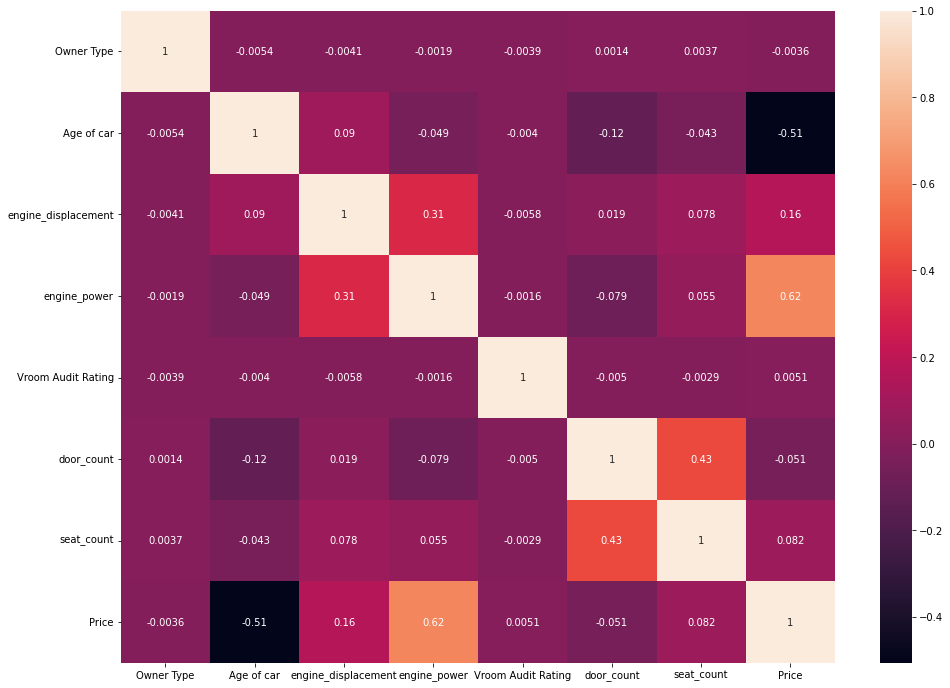

In [ ]:
plt.figure(figsize = (16,12))
sns.heatmap(dff.iloc[:,1:9].corr(), annot=True)

### Split and scale the data

In [ ]:
## separate the target and independent features
X = dff.drop('Price',axis=1)
y = dff['Price']

In [ ]:
## Split the dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
## scale the numerical independent features using standard scalar
ss = StandardScaler()
X_train_sc = X_train.copy()
X_test_sc = X_test.copy()
X_train_sc.iloc[:,[0,3,4,5,6]] = ss.fit_transform(X_train.iloc[:,[0,3,4,5,6]])
X_test_sc.iloc[:,[0,3,4,5,6]] = ss.transform(X_test.iloc[:,[0,3,4,5,6]])

In [ ]:
X_train.head(2)

,Distance,Owner Type,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Maker_bmw,Maker_fiat,Maker_hyundai,Maker_maserati,Maker_nissan,Maker_skoda,Maker_toyota,transmission_man,fuel_type_petrol
51440,28000.0,2,5,1968,135.0,7,4.0,5.0,0,0,0,0,0,1,0,0,0
40392,109738.0,3,7,1995,135.0,4,4.0,5.0,1,0,0,0,0,0,0,0,0


In [ ]:
X_test_sc.head(2)

,Distance,Owner Type,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Maker_bmw,Maker_fiat,Maker_hyundai,Maker_maserati,Maker_nissan,Maker_skoda,Maker_toyota,transmission_man,fuel_type_petrol
49278,-0.305130,1,4,-0.207976,-0.518362,1.410742,0.031037,5.0,0,0,0,0,0,1,0,1,0
12294,-0.284784,4,4,0.044299,0.215842,-0.705964,0.031037,5.0,0,0,0,0,0,0,0,1,0


<Axes: >

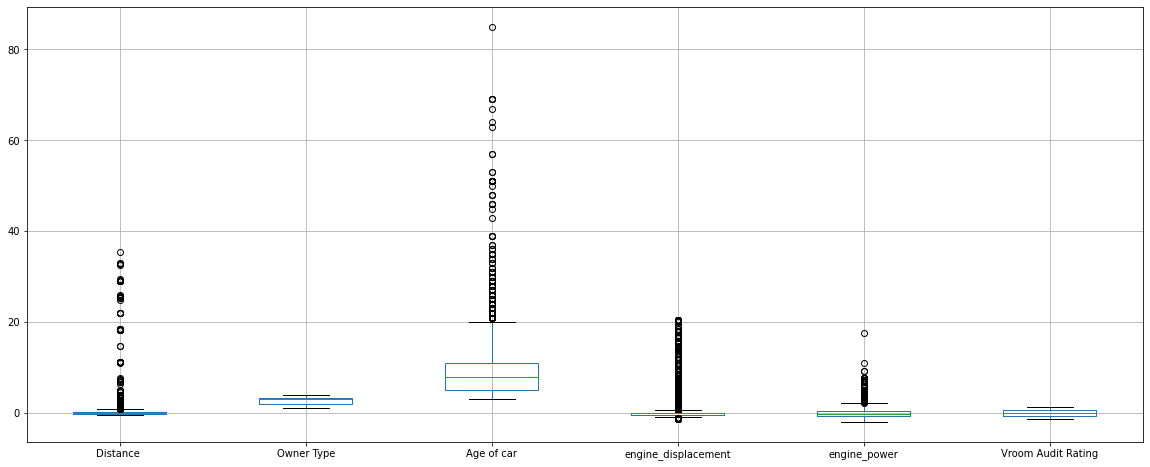

In [ ]:
X_train_sc.iloc[:,:6].boxplot(figsize=(20,8))

<Axes: >

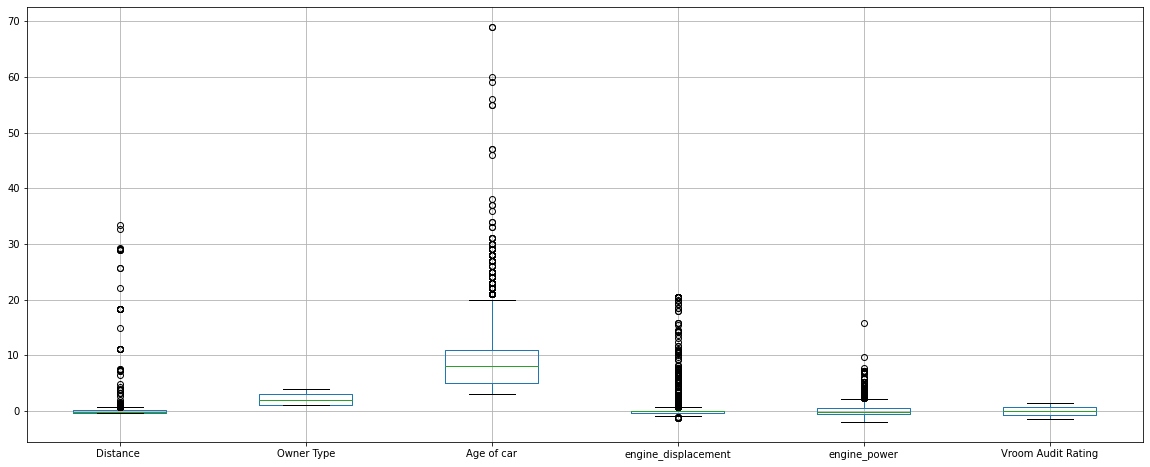

In [ ]:
X_test_sc.iloc[:,:6].boxplot(figsize=(20,8))

- We can see a lot of outliers here. We can remove a few of them

In [ ]:
X_train['Age of car'].describe()

count    37460.000000
mean         8.602322
std          4.670409
min          3.000000
25%          5.000000
50%          8.000000
75%         11.000000
max         85.000000
Name: Age of car, dtype: float64

In [ ]:
dff[dff['Age of car']>70]

,Distance,Owner Type,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Price,Maker_bmw,Maker_fiat,Maker_hyundai,Maker_maserati,Maker_nissan,Maker_skoda,Maker_toyota,transmission_man,fuel_type_petrol
9655,193400.0,4,85,29120,126.0,5,4.0,5.0,874074.75,0,0,0,0,0,1,0,0,1


In [ ]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(37460, 17) (16055, 17)
(37460,) (16055,)


# Model Buidling

In [ ]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs

    model.fit(X_train, y_train)   # fit the model with the train data

    pred = model.predict(X_test)  # make predictions on the test set

    r2 = r2_score(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
                   
    return r2, rmse  # return all the metrics

In [ ]:
## Intializing the models

dt = DecisionTreeRegressor()

rf = RandomForestRegressor()

bg = BaggingRegressor()

gb = GradientBoostingRegressor()

ab = AdaBoostRegressor()

xgb = XGBRegressor()

from sklearn.ensemble import StackingRegressor
estimators = [('dt', dt),('rf', rf),('bg', bg), ('gb', gb), ('ab', ab), ('xgb',xgb)]
reg = StackingRegressor(estimators=estimators, final_estimator=rf)

In [ ]:
result = pd.DataFrame(columns = ['r2_score','RMSE'])

for model, model_name in zip([dt, rf, bg, gb, ab, xgb, reg], ['Decision tree', 'Random Forest', 'Bagging', 
                                                              'Gradient Boosting', 'Ada Boost', 'XG Boost','Stacking']):
    
    result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)

In [ ]:
X_train.head(2)

,Distance,Owner Type,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Maker_bmw,Maker_fiat,Maker_hyundai,Maker_maserati,Maker_nissan,Maker_skoda,Maker_toyota,transmission_man,fuel_type_petrol
51440,28000.0,2,5,1968,135.0,7,4.0,5.0,0,0,0,0,0,1,0,0,0
40392,109738.0,3,7,1995,135.0,4,4.0,5.0,1,0,0,0,0,0,0,0,0


In [ ]:
result

,r2_score,RMSE
Decision tree,0.820481,351492.142991
Random Forest,0.927211,223817.297065
Bagging,0.903994,257045.288548
Gradient Boosting,0.918518,236804.364226
Ada Boost,0.371948,657442.330627
XG Boost,0.938623,205523.294717
Stacking,0.936958,208293.815421


In [ ]:
result_sc = pd.DataFrame(columns = ['r2_score','RMSE'])

for model, model_name in zip([dt, rf, bg, gb, ab, xgb, reg], ['Decision tree', 'Random Forest', 'Bagging', 
                                                              'Gradient Boosting', 'Ada Boost', 'XG Boost','Stacking']):
    
    result_sc.loc[model_name] = fit_n_print(model, X_train_sc, X_test_sc, y_train, y_test)

In [ ]:
result_sc

,r2_score,RMSE
Decision tree,0.822307,349699.893724
Random Forest,0.927103,223982.692574
Bagging,0.895119,268663.367991
Gradient Boosting,0.918521,236799.983853
Ada Boost,0.350818,668410.460077
XG Boost,0.938609,205547.536355
Stacking,0.930590,218560.693067


In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

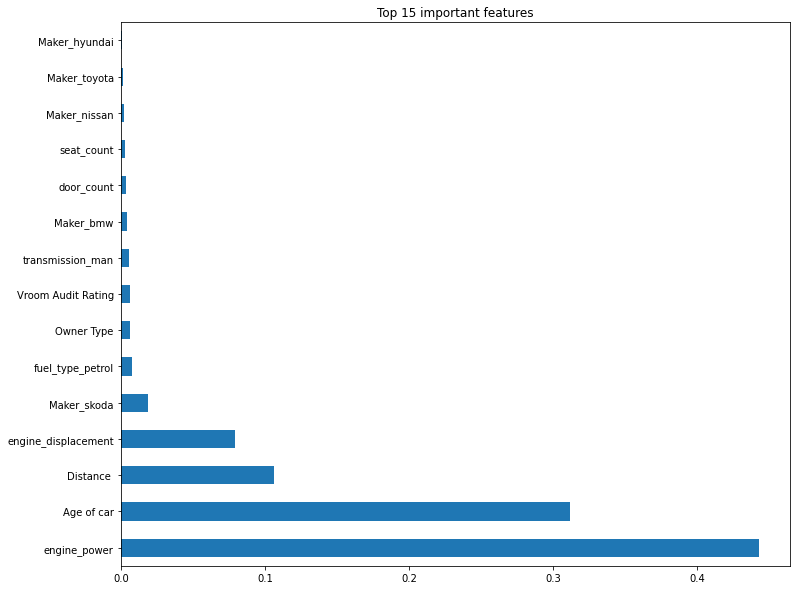

In [ ]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,10)

feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

Text(0, 0.5, 'y_pred')

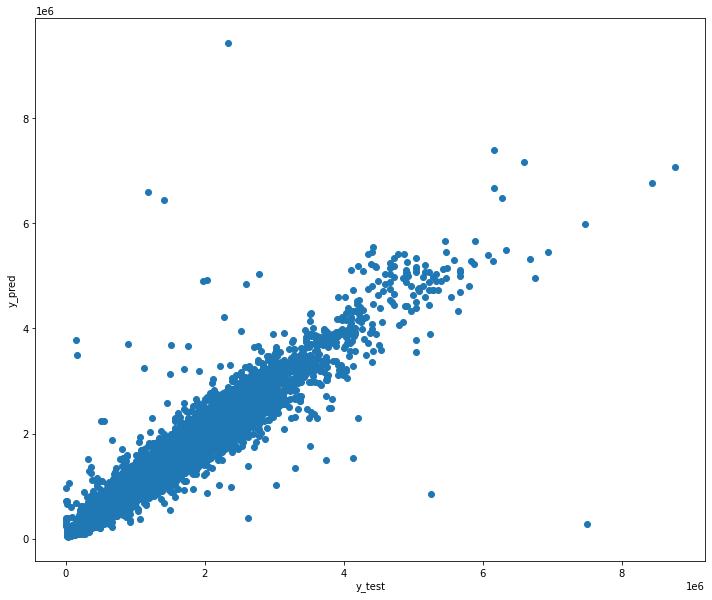

In [ ]:
fig = plt.figure()
y_pred_sc = rf.predict(X_test_sc)
plt.scatter(y_test, y_pred_sc)              
plt.xlabel('y_test')                         
plt.ylabel('y_pred')  

- We can see that some predictions are very off the trend. We could debug and analyse them separately in order to reduce error

# Hyperparameter Tuning for Random Forest Regressor model

## Grid Search

In [ ]:
parameters = [{'n_estimators':[500, 1000],
              'min_samples_split':[5,8, 11]}]

rf_1 = RandomForestRegressor(random_state=0)

rf_grid_search = GridSearchCV(estimator=rf_1,
                             param_grid=parameters,
                             cv=3)

rf_grid_search_model = rf_grid_search.fit(X_train_sc,y_train)

In [ ]:
rf_grid_search_model.best_params_

{'min_samples_split': 11, 'n_estimators': 1000}

In [ ]:
best_grid = rf_grid_search_model.best_estimator_
pred_GS = best_grid.predict(X_test_sc)

print(r2_score(y_test, pred_GS))
print(np.sqrt(mean_squared_error(y_test, pred_GS)))

0.9356999803000489
210361.1370688052


In [ ]:
best_grid

RandomForestRegressor(min_samples_split=11, n_estimators=1000, random_state=0)

In [ ]:
rf_grid_search_model.best_estimator_

RandomForestRegressor(min_samples_split=11, n_estimators=1000, random_state=0)

## Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
parameters = [{'n_estimators':[50,100,500],
              'min_samples_split':[2, 5,8]}]

rf = RandomForestRegressor(random_state=0)

rf_random_search = RandomizedSearchCV(estimator=rf,
                                    param_distributions=parameters,
                                    cv=3)

rf_random_search_model = rf_random_search.fit(X_train_sc,y_train) 

In [ ]:
rf_random_search_model.best_params_

{'n_estimators': 500, 'min_samples_split': 8}

In [ ]:
best_random = rf_random_search_model.best_estimator_ 
pred =  best_random.predict(X_test_sc) # best ensemble model (with optimal combination of hyperparameters)
print(best_random.score(X_test_sc , y_test))
print(r2_score(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))

0.9333251659670727
0.9333251659670727
214210.58552548042


## Conclusion

- We are able to get better accuracy post tuning
- We saw that outliers have influnced the prediction. We can deal with these outliers in a more systematic way and improve the accuracy

# Final Prediction (Optional)

In [ ]:
test_set = pd.read_csv("/content/gdrive/MyDrive/Hackathon/Test_Data_Set.csv")   ## test dataset given for the hackathon

In [ ]:
## Same Preprocessing steps that we done for the train dataset above

test_set.door_count.replace('None', np.NaN, inplace = True)
test_set.seat_count.replace('None', np.NaN, inplace = True)

test_set.door_count = test_set.door_count.astype('float')
test_set.seat_count = test_set.seat_count.astype('float')

test_set['Distance '].fillna(test_set['Distance '].median(), inplace = True)
test_set['engine_power'].fillna(test_set['engine_power'].median(), inplace = True)
test_set['door_count'].fillna(int(test_set['door_count'].mode()), inplace = True)
test_set['seat_count'].fillna(int(test_set['seat_count'].mode()), inplace = True)
test_set['Owner Type'] = test_set['Owner Type'].replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4})

test_set.drop(columns= ['Id','manufacture_year','model','Location','body_type'], inplace= True)


In [ ]:
test_set_final = pd.get_dummies(test_set, drop_first = True)

In [ ]:
test_set_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Distance             5615 non-null   float64
 1   Owner Type           5615 non-null   int64  
 2   Age of car           5615 non-null   int64  
 3   engine_displacement  5615 non-null   int64  
 4   engine_power         5615 non-null   float64
 5   Vroom Audit Rating   5615 non-null   int64  
 6   door_count           5615 non-null   float64
 7   seat_count           5615 non-null   float64
 8   Maker_bmw            5615 non-null   uint8  
 9   Maker_fiat           5615 non-null   uint8  
 10  Maker_hyundai        5615 non-null   uint8  
 11  Maker_maserati       5615 non-null   uint8  
 12  Maker_nissan         5615 non-null   uint8  
 13  Maker_skoda          5615 non-null   uint8  
 14  Maker_toyota         5615 non-null   uint8  
 15  transmission_man     5615 non-null   u

In [ ]:
## scale the independent features 
test_set_final.iloc[:,[0,3,4,5,6]] = ss.fit_transform(test_set_final.iloc[:,[0,3,4,5,6]])

In [ ]:
test_set_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Distance             5615 non-null   float64
 1   Owner Type           5615 non-null   int64  
 2   Age of car           5615 non-null   int64  
 3   engine_displacement  5615 non-null   float64
 4   engine_power         5615 non-null   float64
 5   Vroom Audit Rating   5615 non-null   float64
 6   door_count           5615 non-null   float64
 7   seat_count           5615 non-null   float64
 8   Maker_bmw            5615 non-null   uint8  
 9   Maker_fiat           5615 non-null   uint8  
 10  Maker_hyundai        5615 non-null   uint8  
 11  Maker_maserati       5615 non-null   uint8  
 12  Maker_nissan         5615 non-null   uint8  
 13  Maker_skoda          5615 non-null   uint8  
 14  Maker_toyota         5615 non-null   uint8  
 15  transmission_man     5615 non-null   u

In [83]:
## compute evaluation metrics for random forest model

pred = best_grid = rf_grid_search_model.predict(test_set_final)

In [85]:
pd.Series(pred).to_csv('/content/gdrive/MyDrive/Hackathon/result.csv')